## Import libraries

In [583]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

## Import dataset

### Train data

In [537]:
data = pd.read_csv("./data.csv")
data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [538]:
data.shape

(20631, 14)

### Test data

In [539]:
test_data = pd.read_csv(r"cmapss\CMaps\test_FD001.txt", sep = "\s+", header = None)
test_data.columns = column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]
test_data.head()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


- Selecting only those columns from the test data, which is present in the train data, except from RUL

In [540]:
test_column_names = [col for col in data.columns if col != "remaining_useful_cycles"]
len(test_column_names)

13

In [541]:
test_data = test_data[test_column_names]

In [542]:
test_data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,1,643.02,1585.29,1398.21,553.90,2388.04,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,641.71,1588.45,1395.42,554.85,2388.01,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,642.46,1586.94,1401.34,554.11,2388.05,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,642.44,1584.12,1406.42,554.07,2388.03,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,642.51,1587.19,1401.92,554.16,2388.01,47.31,522.15,2388.03,8.4031,390,38.99,23.4130


In [543]:
test_data.shape

(13096, 13)

In [544]:
test_grp = test_data.groupby("engine")

### RUL data

In [545]:
rul_data = pd.read_csv("cmapss\CMaps\RUL_FD001.txt", sep = "\s+", header = None)
rul_data = rul_data.rename(columns={
    0: "RUL"
})
rul_data.head()


,RUL
0,112
1,98
2,69
3,82
4,91


In [546]:
rul_data.shape

(100, 1)

## Visualization

In [547]:
data_grp = data.groupby("engine")

### Sensor2 data vs RUL

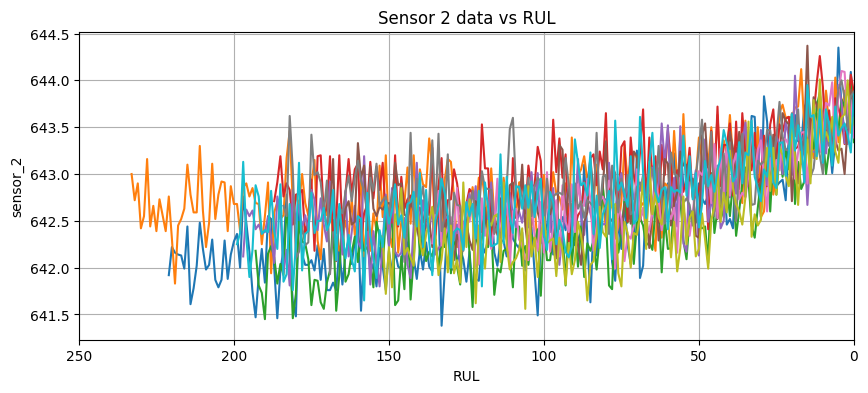

In [548]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor2"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_2")
plt.title("Sensor 2 data vs RUL");

### Sensor3 data vs RUL

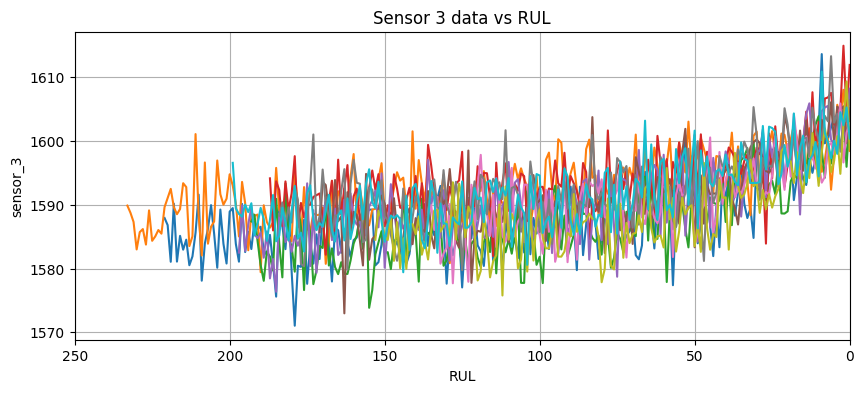

In [549]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor3"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_3")
plt.title("Sensor 3 data vs RUL");

### Sensor4 vs RUL

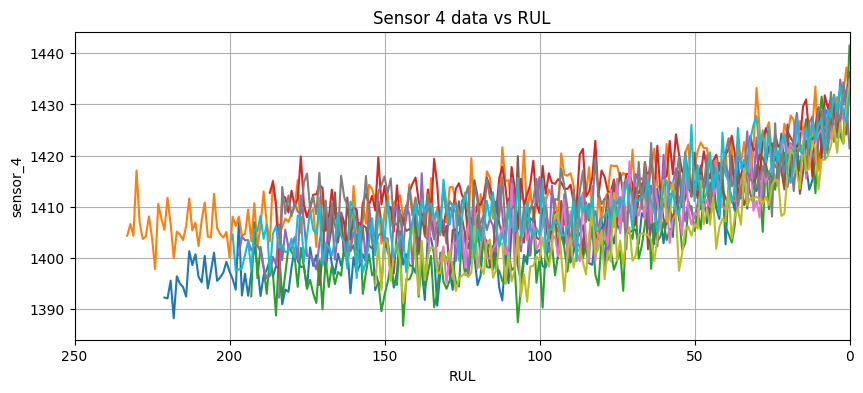

In [550]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor4"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_4")
plt.title("Sensor 4 data vs RUL");

### Sensor7 vs RUL

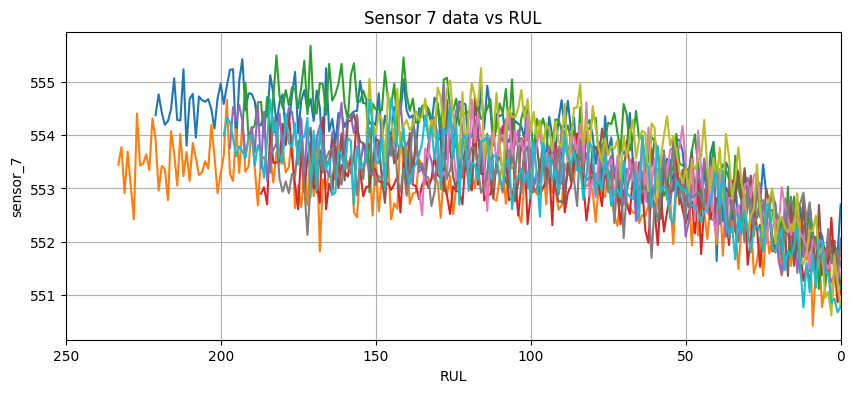

In [551]:
plt.figure(figsize=(10, 4))
for i in range(1, 101):
    if(i % 10 == 0):
        plt.grid(True)
        sns.lineplot(x = data_grp.get_group(i)["remaining_useful_cycles"], y = data_grp.get_group(i)["sensor7"])

plt.xlim(250, 0)
plt.xlabel("RUL")
plt.ylabel("sensor_7")
plt.title("Sensor 7 data vs RUL");

#### **🔑Observation: For each sensor, the RUL is kind of constant before 125 to 150, then the value changes**
#### So, let's clip the max RUL value as `125` (you may experiment with other values as well)

## Data Preprocessing

- Clipping each RUL to 125, that is > 125

In [552]:
data["RUL"] = data["remaining_useful_cycles"].clip(upper=125)
data.drop(columns = ["engine", "remaining_useful_cycles"], inplace = True)

data.head()

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,125
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,125
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,125
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,125
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,125


- Data preparation
- The test set contains some cycles for each engine, but for the experiment, only the last cycle for each engine is required, as we are going to predict the RUL, w.r.t the latest cycle for each engine

In [553]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

X_test = test_grp.last().reset_index().drop(['engine'], axis=1)  # Taking only the last cycle data for each engine
y_test = rul_data.to_numpy().ravel()

In [554]:
X_train.head()

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [555]:
X_test.head(1)

,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,642.58,1581.22,1398.91,554.42,2388.08,47.23,521.79,2388.06,8.4024,393,38.81,23.3552


- Min Max Normalization

In [556]:
scaler = StandardScaler()

In [557]:
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [558]:
print(f"X_train shape: {X_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20631, 12)
y_train shape: (20631,)
X_test shape: (100, 12)
y_test shape: (100,)


## Modelling

- Function to evaluate model performance

In [559]:
def model_performance(y_true, y_pred):
    return {
        "mae": np.round(mae(y_true, y_pred), 3),
        "mse": np.round(mse(y_true, y_pred), 3),
        "rmse": np.round(mse(y_true, y_pred) ** 0.5, 3),
        "r2_score": np.round(r2_score(y_true, y_pred), 3)
    }

### 1. Linear Regression

In [560]:
lin_reg = LinearRegression(n_jobs = -1)
lin_reg.fit(X_scaled, y_train)

LinearRegression(n_jobs=-1)

In [561]:
pred = lin_reg.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 18.485, 'mse': 516.842, 'rmse': 22.734, 'r2_score': 0.702}

In [563]:
y_pred = lin_reg.predict(X_test_scaled)
lin_reg_model_performance = model_performance(y_test, y_pred)
lin_reg_model_performance

{'mae': 18.249, 'mse': 525.064, 'rmse': 22.914, 'r2_score': 0.696}

### 2. Random Forest

In [568]:
rdf = RandomForestRegressor(n_estimators=150, n_jobs = -1, max_depth = 7, random_state = 0)
rdf.fit(X_scaled, y_train)

RandomForestRegressor(max_depth=7, n_estimators=150, n_jobs=-1, random_state=0)

In [569]:
pred = rdf.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 15.816, 'mse': 413.65, 'rmse': 20.338, 'r2_score': 0.762}

In [570]:
y_pred = rdf.predict(X_test_scaled)
rdf_model_performance = model_performance(y_test, y_pred)
rdf_model_performance

{'mae': 15.632, 'mse': 416.581, 'rmse': 20.41, 'r2_score': 0.759}

### 3. XGBoost

In [580]:
xgb = XGBRegressor(n_jobs = -1, random_state = 0)
xgb.fit(X_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [581]:
pred = xgb.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 10.949, 'mse': 220.263, 'rmse': 14.841, 'r2_score': 0.873}

In [582]:
y_pred = xgb.predict(X_test_scaled)
xgb_model_performance = model_performance(y_test, y_pred)
xgb_model_performance

{'mae': 14.982, 'mse': 395.173, 'rmse': 19.879, 'r2_score': 0.771}

### 4. LightGBM

In [584]:
lgbm = LGBMRegressor(n_jobs = -1, random_state = 0)
lgbm.fit(X_scaled, y_train)

LGBMRegressor(n_jobs=-1, random_state=0)

In [585]:
pred = lgbm.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 13.733, 'mse': 329.25, 'rmse': 18.145, 'r2_score': 0.81}

In [586]:
y_pred = lgbm.predict(X_test_scaled)
lgbm_model_performance = model_performance(y_test, y_pred)
lgbm_model_performance

{'mae': 15.241, 'mse': 412.877, 'rmse': 20.319, 'r2_score': 0.761}

### 5. CatBoost

In [587]:
ctb = CatBoostRegressor()
ctb.fit(X_scaled, y_train)

Learning rate set to 0.06605
0:	learn: 39.8486751	total: 142ms	remaining: 2m 22s
1:	learn: 38.1799885	total: 145ms	remaining: 1m 12s
2:	learn: 36.6347334	total: 148ms	remaining: 49.3s
3:	learn: 35.2079496	total: 152ms	remaining: 37.8s
4:	learn: 33.8937761	total: 155ms	remaining: 30.9s
5:	learn: 32.7007794	total: 158ms	remaining: 26.2s
6:	learn: 31.6174161	total: 161ms	remaining: 22.8s
7:	learn: 30.6149299	total: 164ms	remaining: 20.3s
8:	learn: 29.7033344	total: 168ms	remaining: 18.5s
9:	learn: 28.8779557	total: 172ms	remaining: 17s
10:	learn: 28.1311194	total: 175ms	remaining: 15.8s
11:	learn: 27.4539560	total: 179ms	remaining: 14.7s
12:	learn: 26.8408588	total: 183ms	remaining: 13.9s
13:	learn: 26.2896256	total: 187ms	remaining: 13.2s
14:	learn: 25.7856689	total: 191ms	remaining: 12.5s
15:	learn: 25.3296450	total: 195ms	remaining: 12s
16:	learn: 24.9288066	total: 199ms	remaining: 11.5s
17:	learn: 24.5551794	total: 203ms	remaining: 11s
18:	learn: 24.2151922	total: 206ms	remaining: 10.

In [589]:
pred = ctb.predict(X_scaled)
model_performance(y_train, pred)

{'mae': 12.915, 'mse': 294.289, 'rmse': 17.155, 'r2_score': 0.831}

In [594]:
y_pred = ctb.predict(X_test_scaled)
ctb_model_performance = model_performance(y_test, y_pred)
ctb_model_performance

{'mae': 14.759, 'mse': 386.822, 'rmse': 19.668, 'r2_score': 0.776}

## Comparison

- Creating a dataframe using the model performances

In [604]:
comparison_df = pd.DataFrame({
    "model": ["linear_regression", "random_forest", "xgboost", "lightgbm", "catboost"],
    "mae": [lin_reg_model_performance["mae"]] + [rdf_model_performance["mae"]] + [xgb_model_performance["mae"]] + [lgbm_model_performance["mae"]] + [ctb_model_performance["mae"]],
    "mse": [lin_reg_model_performance["mse"]] + [rdf_model_performance["mse"]] + [xgb_model_performance["mse"]] + [lgbm_model_performance["mse"]] + [ctb_model_performance["mse"]],
    "rmse": [lin_reg_model_performance["rmse"]] + [rdf_model_performance["rmse"]] + [xgb_model_performance["rmse"]] + [lgbm_model_performance["rmse"]] + [ctb_model_performance["rmse"]],
    "r2_score": [lin_reg_model_performance["r2_score"]] + [rdf_model_performance["r2_score"]] + [xgb_model_performance["r2_score"]] + [lgbm_model_performance["r2_score"]] + [ctb_model_performance["r2_score"]],
})

In [605]:
comparison_df.set_index("model", inplace = True)
comparison_df

,mae,mse,rmse,r2_score
model,,,,
linear_regression,18.249,525.064,22.914,0.696
random_forest,15.632,416.581,20.410,0.759
xgboost,14.982,395.173,19.879,0.771
lightgbm,15.241,412.877,20.319,0.761
catboost,14.759,386.822,19.668,0.776


- Sort the dataframe in descending order, w.r.t `RMSE`

In [610]:
comparison_df.sort_values(by = "rmse").style.background_gradient()

,mae,mse,rmse,r2_score
model,,,,
catboost,14.759000,386.822000,19.668000,0.776000
xgboost,14.982000,395.173000,19.879000,0.771000
lightgbm,15.241000,412.877000,20.319000,0.761000
random_forest,15.632000,416.581000,20.410000,0.759000
linear_regression,18.249000,525.064000,22.914000,0.696000


### Up to this, clearly, `CatBoost` is the winner

In [619]:
y_pred_ctb = ctb.predict(X_test_scaled)

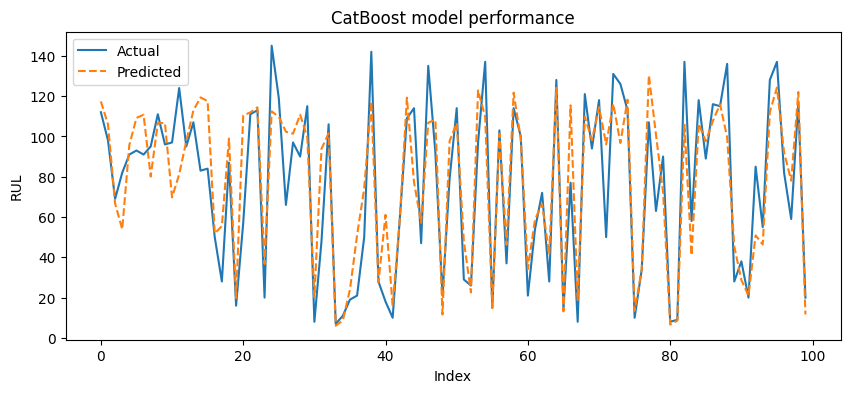

In [622]:
plt.figure(figsize = (10, 4))
# plt.grid(True)
sns.lineplot(y_test, label = "Actual")
sns.lineplot(y_pred_ctb, linestyle = "--", label = "Predicted");
plt.xlabel("Index")
plt.ylabel("RUL")
plt.title("CatBoost model performance");